<a href="https://colab.research.google.com/github/ahmadSoliman94/Machine-Learning/blob/main/Electro%20Pi%20Scholarship/Predict_employee_attrition_and_performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Packages importing

In [143]:
!pip install mplcyberpunk


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [269]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mplcyberpunk
import os
import seaborn as sns

import xgboost as xgb
 
from imblearn.over_sampling import SMOTE
from scipy import stats
from scipy.stats import randint
from  sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling  import RandomOverSampler
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score ,confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.ensemble import RandomForestRegressor


In [145]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [146]:
os.chdir('/content/drive/MyDrive')

In [147]:
path = '/content/drive/MyDrive'


In [148]:
!ls

 churn-bigml-20.csv	   Fusion
 churn-bigml-80.csv	   Hands-on-projects
 Classroom		   HR-Employee-Attrition.csv
'Colab Notebooks'	  'Medical deep learning'
 darknet		  'Predict employee attrition and performance.ipynb'
'Deep Learning Basics'	   projcet
 EDA.ipynb		  'PyTorch Fundamentals.ipynb'
'electro pi scholarship'  'Telecom Churn.ipynb'


In [149]:
df_path = os.path.join(path,'HR-Employee-Attrition.csv')

## Loading the data files into a pandas dataframe

In [150]:
df = pd.read_csv(df_path)

## Showing the head of the data

In [151]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## Exploratory Data Analysis


### Descriptive Statistics


In [152]:
df.describe(include='all')

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470,1470,1470.000000,1470,1470.000000,1470.000000,1470,1470.0,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,2,3,NaN,3,NaN,NaN,6,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,No,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1233,1043,NaN,961,NaN,NaN,606,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36.923810,NaN,NaN,802.485714,NaN,9.192517,2.912925,NaN,1.0,1024.865306,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,NaN,NaN,403.509100,NaN,8.106864,1.024165,NaN,0.0,602.024335,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,NaN,NaN,102.000000,NaN,1.000000,1.000000,NaN,1.0,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,NaN,NaN,465.000000,NaN,2.000000,2.000000,NaN,1.0,491.250000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,NaN,NaN,802.000000,NaN,7.000000,3.000000,NaN,1.0,1020.500000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,NaN,NaN,1157.000000,NaN,14.000000,4.000000,NaN,1.0,1555.750000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000


### Correlation

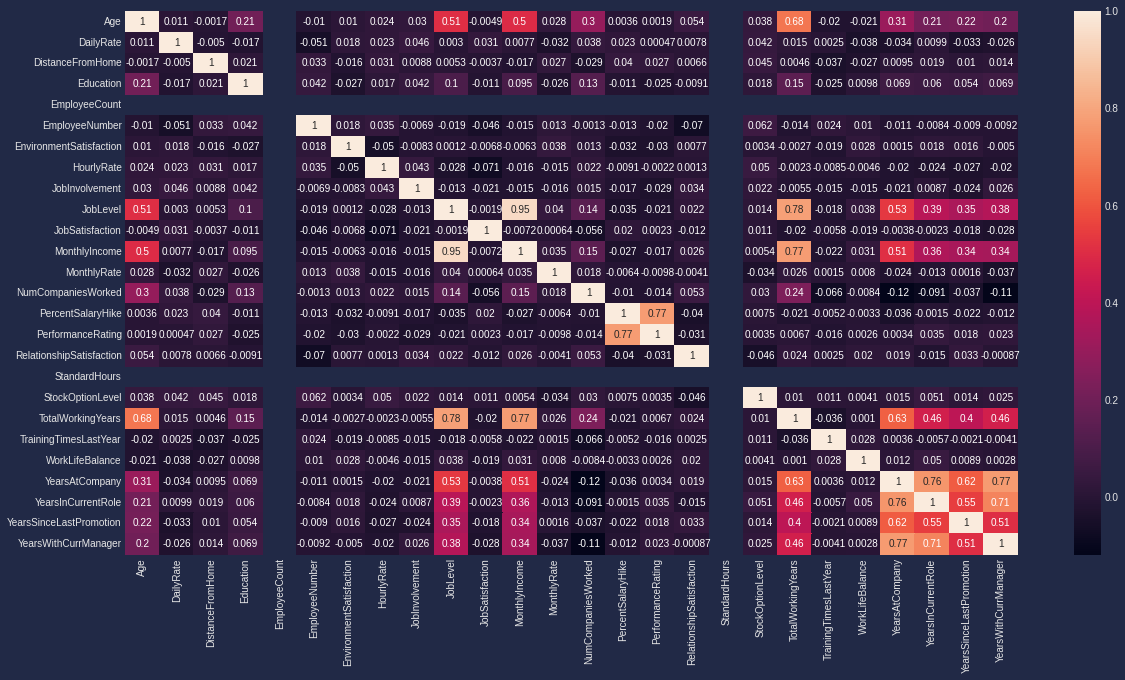

In [153]:
plt.style.use('cyberpunk')
cor = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(cor,annot=True)
plt.show()

### Show infos of features

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

### Checking missing values

In [155]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

### Features Disturbtions

In [156]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

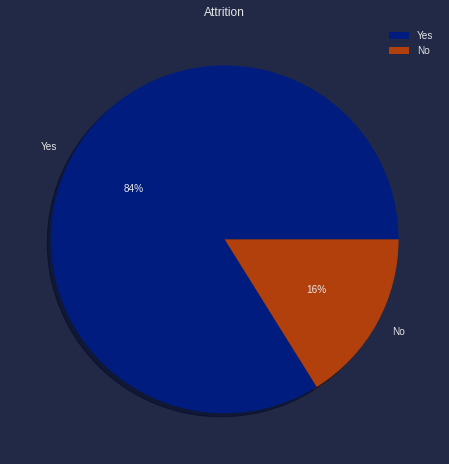

In [157]:
# Attrition
label = df['Attrition'].unique()
data = df['Attrition'].value_counts()

colors = sns.color_palette('dark')
plt.figure(figsize=(8,8))
plt.pie(data,labels=label,colors=colors,autopct='%.0f%%',shadow=True,)
mplcyberpunk.add_underglow()
plt.legend()
plt.title('Attrition')
plt.show()

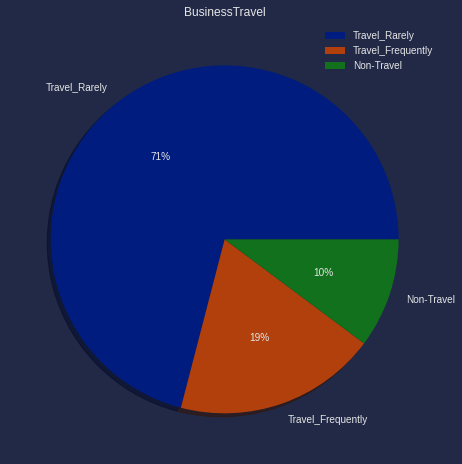

In [158]:
label = df['BusinessTravel'].unique()
data = df['BusinessTravel'].value_counts()

colors = sns.color_palette('dark')
plt.figure(figsize=(8,8))
plt.pie(data,labels=label,colors=colors,autopct='%.0f%%',shadow=True,)
mplcyberpunk.add_underglow()
plt.legend()
plt.title('BusinessTravel')
plt.show()

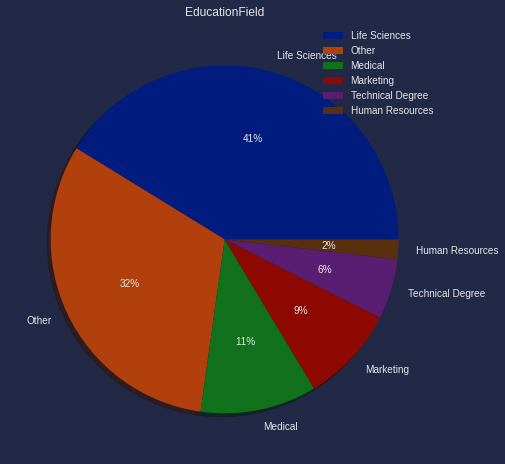

In [159]:
# EducationField

label = df['EducationField'].unique()
data = df['EducationField'].value_counts()

colors = sns.color_palette('dark')
plt.figure(figsize=(8,8))
plt.pie(data,labels=label,colors=colors,autopct='%.0f%%',shadow=True,)
mplcyberpunk.add_underglow()
plt.legend()
plt.title('EducationField')
plt.show()

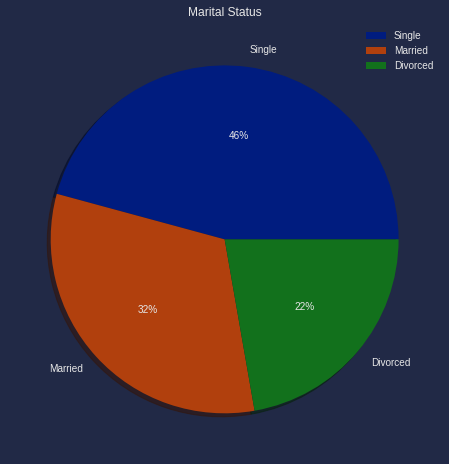

In [160]:
# MaritalStatus

label = df['MaritalStatus'].unique()
data = df['MaritalStatus'].value_counts()

colors = sns.color_palette('dark')
plt.figure(figsize=(8,8))
plt.pie(data,labels=label,colors=colors,autopct='%.0f%%',shadow=True,)
mplcyberpunk.add_underglow()
plt.legend()
plt.title('Marital Status')
plt.show()

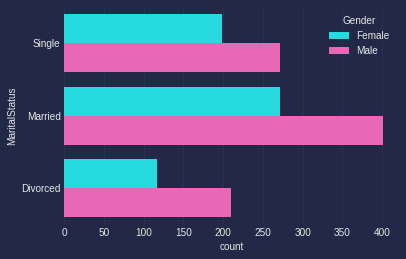

In [161]:
sns.countplot(y=df['MaritalStatus'],hue=df['Gender'])

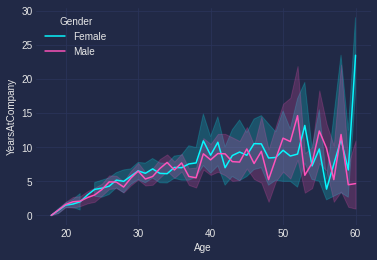

In [162]:
sns.lineplot(x='Age',y='YearsAtCompany',hue='Gender',data=df)

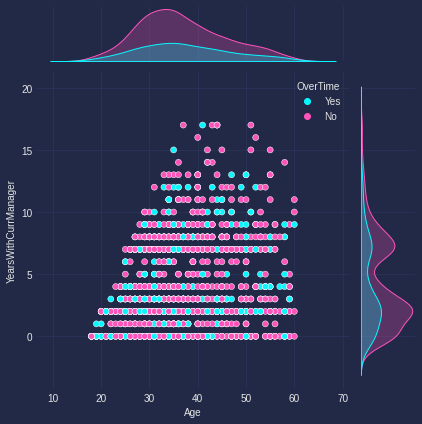

In [163]:
sns.jointplot(x='Age',y='YearsWithCurrManager',hue='OverTime',data=df)

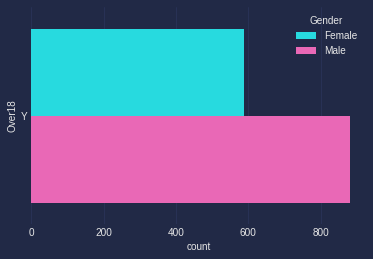

In [164]:
sns.countplot(y=df['Over18'],hue=df['Gender'])

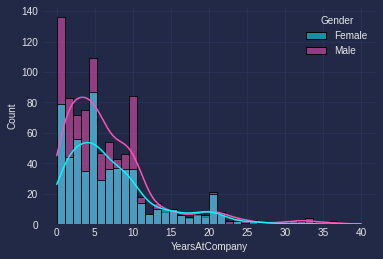

In [165]:
sns.histplot(x="YearsAtCompany",hue='Gender',kde=True,data=df)

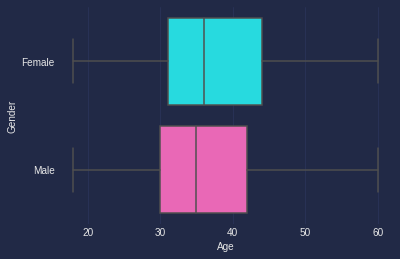

In [166]:
sns.boxplot(data=df,x='Age', y='Gender')

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


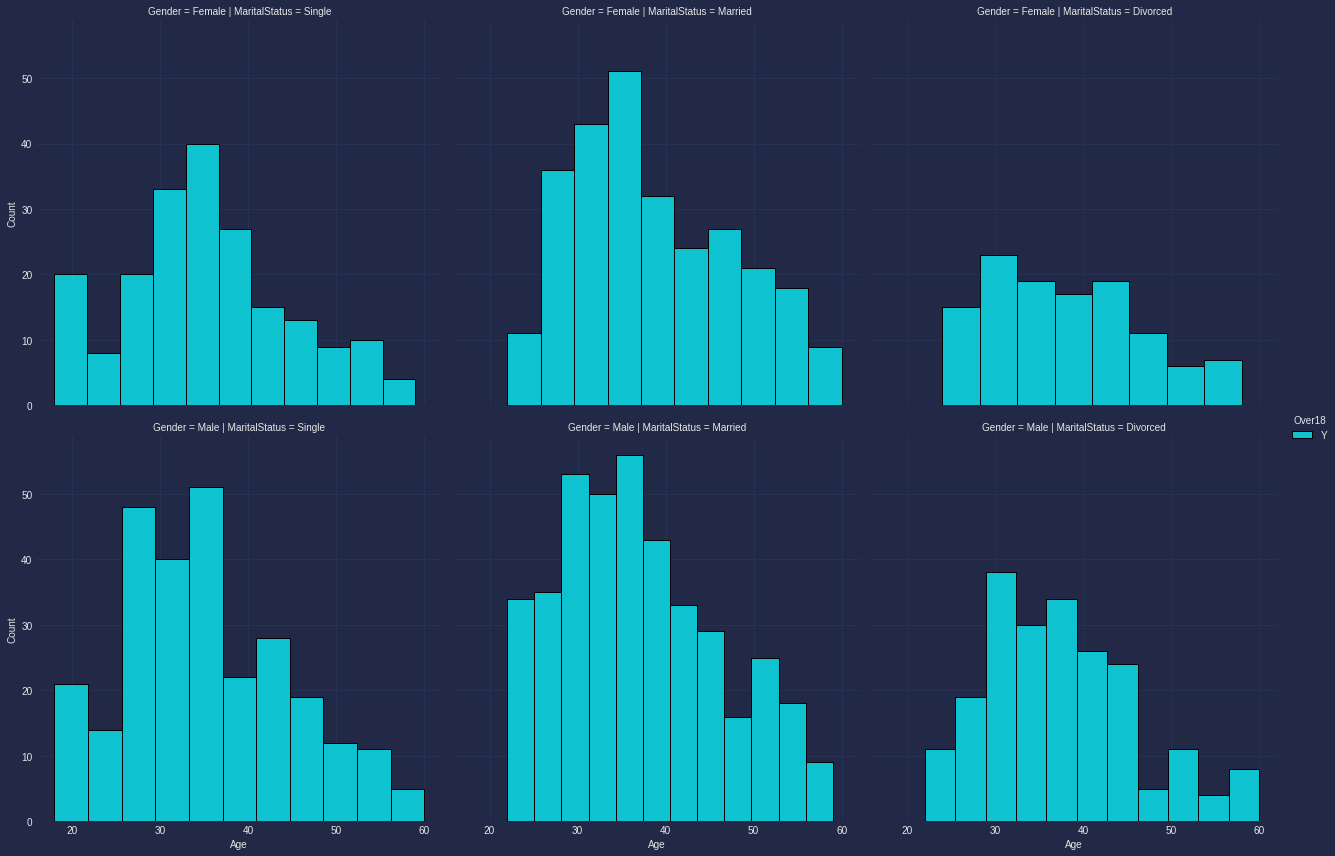

In [167]:
sns.FacetGrid(df, row='Gender',col='MaritalStatus',hue='Over18', size=6) \
   .map(sns.histplot,'Age') \
   .add_legend()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


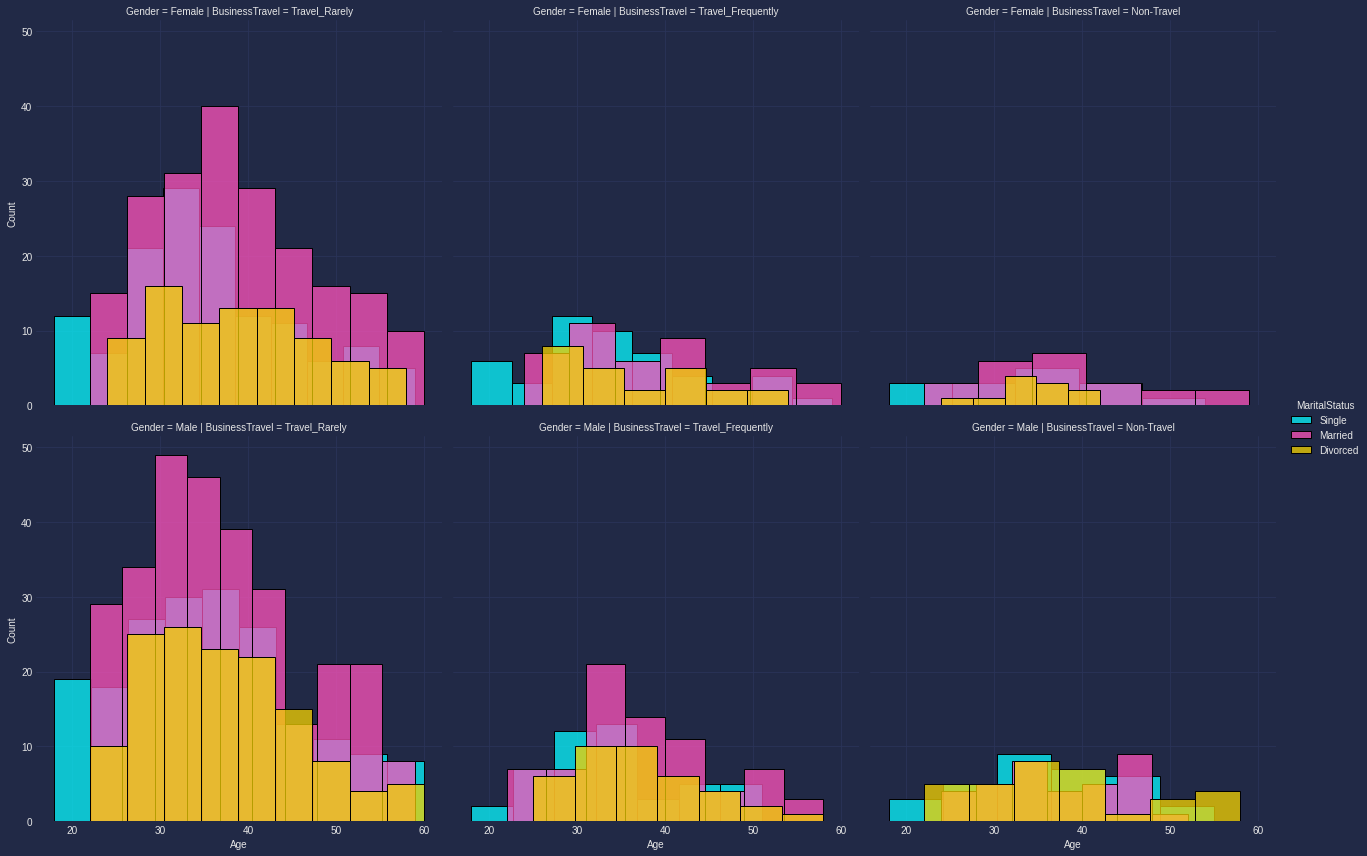

In [168]:
sns.FacetGrid(df, row='Gender',col='BusinessTravel',hue='MaritalStatus', size=6) \
   .map(sns.histplot,'Age') \
   .add_legend()

### examine the numerical features.

In [169]:
numeric_features = df.select_dtypes(include=[np.number])
print(numeric_features.columns)
print('****************************************************************************')
print(f'There is {numeric_features.shape[1]} numeric features.')

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')
****************************************************************************
There is 26 numeric features.


### examine the categorical features.

In [170]:
categorical_features = df.select_dtypes(include=[np.object_,"category"])
print(categorical_features.columns)
print('****************************************************************************')
print(f'There is {categorical_features.shape[1]} categorical features.')

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')
****************************************************************************
There is 9 categorical features.


### Handling object datatype

In [171]:
le = LabelEncoder()

cat_fea= df.select_dtypes(include=['object']).columns.tolist()
df[cat_fea] = df[cat_fea].apply(le.fit_transform)

In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int64
 2   BusinessTravel            1470 non-null   int64
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   int64
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   int64
 8   EmployeeCount             1470 non-null   int64
 9   EmployeeNumber            1470 non-null   int64
 10  EnvironmentSatisfaction   1470 non-null   int64
 11  Gender                    1470 non-null   int64
 12  HourlyRate                1470 non-null   int64
 13  JobInvolvement            1470 non-null   int64
 14  JobLevel                  1470 non-null 

### **Predict employee attrition:**

### Splitting Data


In [173]:
X = df.drop('Attrition',axis=1)
y = df['Attrition']

print(f' Shape of X: {X.shape} \n Shape of y: {y.shape}')

 Shape of X: (1470, 34) 
 Shape of y: (1470,)


## Data Scaling


In [174]:
scl = StandardScaler()
X = scl.fit_transform(X)

## Data Splitting into train and test


In [175]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,shuffle=True,random_state=0)
print(f' Shape of X_train: {X_train.shape} & Shape of X_test: {X_test.shape}')
print(f' Shape of y_train: {y_train.shape} & Shape of y_test: {y_test.shape}')

 Shape of X_train: (1176, 34) & Shape of X_test: (294, 34)
 Shape of y_train: (1176,) & Shape of y_test: (294,)


## *Building Models*

In [176]:
def select_model(model,x_train,y_train,x_test,y_test):
  model.fit(x_train,y_train)
  y_pred = model.predict(x_test)
  y_pred_train = model.predict(x_train)

  print('Accuracy score of Train: {}'.format(accuracy_score(y_train,y_pred_train)*100))
  print('Accuracy score of Test: {}'.format(accuracy_score(y_test,y_pred)*100))

In [177]:
def hyper_parameter_tuning(model,parameters,x_train,y_train,x_test,y_test):
  tuning = search = RandomizedSearchCV(estimator = model,         
                            param_distributions= parameters,       
                           scoring = 'accuracy',          
                           cv = 5,                       
                           n_jobs = 1,
                          verbose=0)
  tuning.fit(x_train,y_train)
  print("best accuracy is :" , tuning.best_score_ * 100)
  print(search.best_params_) 

  model = tuning.best_estimator_
  model.fit(x_train, y_train)

  val_score = cross_val_score(estimator = model, X = x_train, y = y_train, cv = 5)
  y_pred = model.predict(x_test)
  print('\n*********************************************************************************** \n')
  print("Validation score: %.5f%% (%.5f%%)" % (val_score.mean()*100.0, val_score.std()*100.0))
  print('Accuracy score: {}'.format(accuracy_score(y_test,y_pred)*100))
  print('\n*********************************************************************************** \n')
  print('confusion matrix: \n')
  cm = confusion_matrix(y_test, y_pred)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm ,display_labels=model.classes_)
  disp.plot()
  plt.show()

  print('\n*********************************************************************************** \n')
  print('classification report: \n')
  print(classification_report(y_test, y_pred))


### *Logistic Regression:*

In [178]:
lg_clf = LogisticRegression(random_state = 0)
select_model(lg_clf,X_train,y_train,X_test,y_test)

Accuracy score of Train: 87.67006802721087
Accuracy score of Test: 88.43537414965986


####  Hyperparameter tuning:

best accuracy is : 86.3086909484313
{'multi_class': 'multinomial', 'C': 0.9}

*********************************************************************************** 

Validation score: 86.30869% (1.19410%)
Accuracy score: 88.09523809523809

*********************************************************************************** 

confusion matrix: 



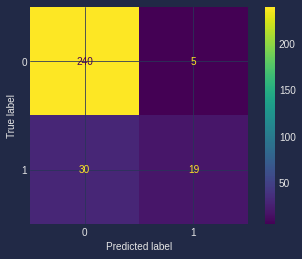


*********************************************************************************** 

classification report: 

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       245
           1       0.79      0.39      0.52        49

    accuracy                           0.88       294
   macro avg       0.84      0.68      0.73       294
weighted avg       0.87      0.88      0.86       294



In [179]:
par = {'C':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],
       'multi_class':['auto','ovr','multinomial']}


hyper_parameter_tuning(lg_clf,par,X_train,y_train,X_test,y_test)

### *Decision Tree Classifier*:

In [180]:
dt_clf = DecisionTreeClassifier(random_state = 0)
select_model(dt_clf,X_train,y_train,X_test,y_test)

Accuracy score of Train: 100.0
Accuracy score of Test: 74.82993197278913


### Hyperparameter tuning:

best accuracy is : 84.61089073205915
{'splitter': 'random', 'random_state': 0, 'max_depth': 3, 'criterion': 'gini'}

*********************************************************************************** 

Validation score: 84.61089% (1.32887%)
Accuracy score: 83.6734693877551

*********************************************************************************** 

confusion matrix: 



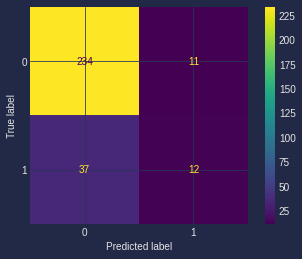


*********************************************************************************** 

classification report: 

              precision    recall  f1-score   support

           0       0.86      0.96      0.91       245
           1       0.52      0.24      0.33        49

    accuracy                           0.84       294
   macro avg       0.69      0.60      0.62       294
weighted avg       0.81      0.84      0.81       294



In [181]:
parameters= {'criterion':['gini', 'entropy'],
             'max_depth':[3,5,7],'splitter':['best', 'random'],
            'random_state': [0,42]}

hyper_parameter_tuning(dt_clf,parameters,X_train,y_train,X_test,y_test)

###K-Neighbors Classifier

In [182]:
knn_clf = KNeighborsClassifier()
select_model(knn_clf, X_train,y_train,X_test, y_test)

Accuracy score of Train: 86.98979591836735
Accuracy score of Test: 83.6734693877551


best accuracy is : 83.93040028849622
{'weights': 'uniform', 'p': 3, 'n_neighbors': 7, 'algorithm': 'ball_tree'}

*********************************************************************************** 

Validation score: 83.93040% (1.09208%)
Accuracy score: 85.03401360544217

*********************************************************************************** 

confusion matrix: 



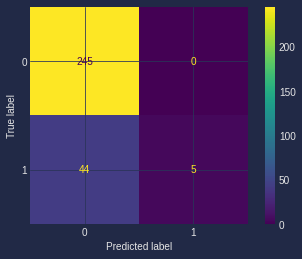


*********************************************************************************** 

classification report: 

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       245
           1       1.00      0.10      0.19        49

    accuracy                           0.85       294
   macro avg       0.92      0.55      0.55       294
weighted avg       0.87      0.85      0.80       294



In [183]:
# hyperparameter tuning

parameters= {'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
             'n_neighbors':[3,5,7],'weights':['uniform', 'distance'],'p':[2,3,5,6,7]}

hyper_parameter_tuning(knn_clf,parameters,X_train,y_train,X_test,y_test)

### SVM Classifier

In [184]:
svm_clf = SVC(random_state = 0) 
select_model(svm_clf, X_train,y_train,X_test, y_test)

Accuracy score of Train: 91.15646258503402
Accuracy score of Test: 86.05442176870748


best accuracy is : 86.73494410385864
{'kernel': 'linear', 'gamma': 'scale', 'degree': 5, 'C': 10}

*********************************************************************************** 

Validation score: 86.73494% (0.55801%)
Accuracy score: 88.09523809523809

*********************************************************************************** 

confusion matrix: 



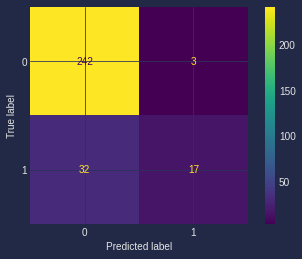


*********************************************************************************** 

classification report: 

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       245
           1       0.85      0.35      0.49        49

    accuracy                           0.88       294
   macro avg       0.87      0.67      0.71       294
weighted avg       0.88      0.88      0.86       294



In [185]:
# hyperparameter tuning

parameters= {'C':[1,0.3,0.001,3,10],
             'kernel':['linear', 'rbf','poly'],
             'degree':[2,3,5,7],
             'gamma':['scale', 'auto']}

hyper_parameter_tuning(svm_clf,parameters,X_train,y_train,X_test,y_test)

### Random Forest Classifier

In [186]:
rf_clf = RandomForestClassifier(random_state = 0)

select_model(rf_clf,X_train,y_train,X_test,y_test)

Accuracy score of Train: 100.0
Accuracy score of Test: 84.35374149659864


best accuracy is : 85.71330688784708
{'n_estimators': 104, 'max_leaf_nodes': 493, 'max_features': 'sqrt', 'max_depth': 3352, 'criterion': 'entropy', 'bootstrap': 'False'}

*********************************************************************************** 

Validation score: 85.71331% (0.65639%)
Accuracy score: 84.6938775510204

*********************************************************************************** 

confusion matrix: 



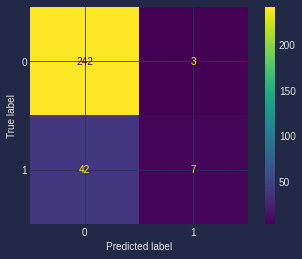


*********************************************************************************** 

classification report: 

              precision    recall  f1-score   support

           0       0.85      0.99      0.91       245
           1       0.70      0.14      0.24        49

    accuracy                           0.85       294
   macro avg       0.78      0.57      0.58       294
weighted avg       0.83      0.85      0.80       294



In [187]:
# hyperparameter tuning

parameters= {'criterion': ['gini','entropy'],
             'bootstrap':['True','False'],
             'max_depth':[*range(1, 10000)],
             'max_features': ['auto', 'sqrt','log2'],
             'max_leaf_nodes':[*range(1, 10000)],
             'n_estimators': [*range(30, 1000)]
             }

hyper_parameter_tuning(rf_clf,parameters,X_train,y_train,X_test,y_test)

### XGBoost Classifier

In [188]:
xgb_clf = xgb.XGBClassifier(random_state = 0)
select_model(xgb_clf,X_train,y_train,X_test,y_test)

Accuracy score of Train: 94.5578231292517
Accuracy score of Test: 86.73469387755102


best accuracy is : 87.66967183555717
{'colsample_bytree': 0.5370053219979781, 'learning_rate': 0.06057544767786497, 'max_depth': 8, 'min_child_weight': 2, 'n_estimators': 184, 'subsample': 0.31567659883959914}

*********************************************************************************** 

Validation score: 87.66967% (0.60923%)
Accuracy score: 86.39455782312925

*********************************************************************************** 

confusion matrix: 



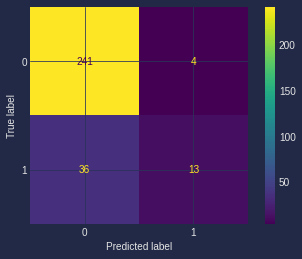


*********************************************************************************** 

classification report: 

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       245
           1       0.76      0.27      0.39        49

    accuracy                           0.86       294
   macro avg       0.82      0.62      0.66       294
weighted avg       0.85      0.86      0.84       294



In [189]:
# hyperparameter tuning


parameters = {'n_estimators': stats.randint(150, 300),
              'learning_rate': stats.uniform(0.01, 0.3),
              'subsample': stats.uniform(0.3, 0.5),
              'max_depth': [3, 4, 5, 6, 7, 8, 9],
              'colsample_bytree': stats.uniform(0.5, 0.4),
              'min_child_weight': [1, 2, 3, 4]
             }

hyper_parameter_tuning(xgb_clf,parameters,X_train,y_train,X_test,y_test)

### **Predict employee performance:**

In [332]:
X = df.drop('PerformanceRating',axis=1)
y = df['PerformanceRating']

print(f' Shape of X: {X.shape} \n Shape of y: {y.shape}')

 Shape of X: (1470, 34) 
 Shape of y: (1470,)


In [333]:
scl = StandardScaler()
X = scl.fit_transform(X)

In [334]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,shuffle=True,random_state=0)
print(f' Shape of X_train: {X_train.shape} & Shape of X_test: {X_test.shape}')
print(f' Shape of y_train: {y_train.shape} & Shape of y_test: {y_test.shape}')

 Shape of X_train: (1176, 34) & Shape of X_test: (294, 34)
 Shape of y_train: (1176,) & Shape of y_test: (294,)


In [335]:
def select_regressor(model,x_train,y_train,x_test,y_test):
  model.fit(x_train,y_train)
  y_pred = model.predict(x_test)
  y_pred_train = model.predict(x_train)

  print('R squared score of Train: {}'.format(r2_score(y_train,y_pred_train)*100))
  print('R squared score of Test: {}'.format(r2_score(y_test,y_pred)*100))

In [336]:
def hyper_parameter_tuning_reg(model,parameters,x_train,y_train,x_test,y_test):
  tuning = search = RandomizedSearchCV(estimator = model,         
                            param_distributions= parameters,       
                           scoring = 'r2',          
                           cv = 5,                       
                           n_jobs = 1,
                          verbose=0)
  tuning.fit(x_train,y_train)
  print("best r2 score:" , tuning.best_score_ * 100)
  print(search.best_params_) 

  model = tuning.best_estimator_
  model.fit(x_train, y_train)

  val_score = cross_val_score(estimator = model, X = x_train, y = y_train, cv = 5)
  y_pred = model.predict(x_test)
  print('\n*********************************************************************************** \n')
  print("Validation score: %.5f%% (%.5f%%)" % (val_score.mean()*100.0, val_score.std()*100.0))
  print('R squared score: {}'.format(r2_score(y_test,y_pred)*100))
  print('\n*********************************************************************************** \n')
  print('Result visualization: \n')
 
  # plt.scatter(x_train, y_train)
  # plt.title("Linear Regression")
  # plt.xlabel("Failures")
  # plt.ylabel("Grade average")
  # plt.plot(x_test, model.predict(x_test), color="r")
  # plt.show()

In [337]:
lin_reg = LinearRegression()
select_regressor(lin_reg,X_train,y_train,X_test,y_test)

R squared score of Train: 60.571659859657636
R squared score of Test: 58.36481850488806


#### Adding Polynomial Features

In [338]:
poly_fea = PolynomialFeatures(degree=2)
X_poly_train  = poly_fea.fit_transform(X_train)
X_poly_test  = poly_fea.transform(X_test)

select_regressor(lin_reg,X_poly_train,y_train,X_poly_test,y_test)

R squared score of Train: 87.82456209301147
R squared score of Test: 53.5281238263967


### Ridge regressor

In [339]:
ridge =  Ridge()
select_regressor(ridge,X_poly_train,y_train,X_poly_test,y_test)

R squared score of Train: 87.8423222477676
R squared score of Test: 54.185709745937025


In [340]:
# hyperparameter tuning


parameters = {'alpha': stats.uniform(0.01, 1.0)}

hyper_parameter_tuning_reg(ridge,parameters,X_poly_train,y_train,X_poly_test,y_test)

best r2 score: 42.018651876856964
{'alpha': 0.8564455090519296}

*********************************************************************************** 

Validation score: 42.01865% (9.01696%)
R squared score: 54.10589646202323

*********************************************************************************** 

Result visualization: 



### Lasso regressor

In [341]:
lasso =  Lasso()
select_regressor(lasso,X_poly_train,y_train,X_poly_test,y_test)

R squared score of Train: 0.0
R squared score of Test: -0.18794252394838118


In [342]:
# hyperparameter tuning


parameters = {'alpha': stats.uniform(0.01, 1.0)}

hyper_parameter_tuning_reg(lasso,parameters,X_poly_train,y_train,X_poly_test,y_test)

best r2 score: 76.23869692498529
{'alpha': 0.028747641976752718}

*********************************************************************************** 

Validation score: 76.23870% (2.53699%)
R squared score: 76.02279876257317

*********************************************************************************** 

Result visualization: 



In [343]:
rf_reg = RandomForestRegressor()
select_regressor(rf_reg,X_train,y_train,X_test,y_test)

R squared score of Train: 100.0
R squared score of Test: 100.0


In [344]:
parameters= {'n_estimators':[30,40,50,100],
             'criterion':['squared_error','absolute_error'],
             'max_depth':[3,4,5,6,7,8,9,11],
             'max_features':['sqrt','log2']
            }

hyper_parameter_tuning_reg(rf_reg,parameters,X_train,y_train,X_test,y_test)

best r2 score: 92.29655153771927
{'n_estimators': 30, 'max_features': 'log2', 'max_depth': 9, 'criterion': 'absolute_error'}

*********************************************************************************** 

Validation score: 89.37991% (3.86223%)
R squared score: 86.62244897959184

*********************************************************************************** 

Result visualization: 

